In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
!pip install fbprophet
print('complete')

  Retrying (Retry(total=4, connect=None, read=None, redirect=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.python.org', port=443): Read timed out. (read timeout=15)",)': /simple/pystan/
    100% |################################| 62.2MB 24kB/s  eta 0:00:01    20% |######                          | 12.5MB 65.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for fbprophet ... - \ | / - \ | done
  Stored in directory: /home/nbuser/.cache/pip/wheels/75/ac/68/cdce34c1e98924b2cd7c02049ed8990646405dec7aaf98b44e
Successfully built fbprophet
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
complete


In [3]:
from fbprophet import Prophet

## The Data
    We will be looking at Transactions at advertised locations for the last 2 years, by Day & Week. This data will be used to forecast out weekly Transactions to compare last year to.

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/work/master/Sales_by_day.csv', parse_dates=['ds'])
txns = pd.DataFrame(data[['ds','# Txns']])
txns['y'] = np.log10(txns['# Txns'])
del txns['# Txns']
txns

,ds,y
0,2015-02-01,4.721918
1,2015-02-02,4.709092
2,2015-02-03,4.673058
3,2015-02-04,4.684917
4,2015-02-05,4.679173
5,2015-02-06,4.755204
6,2015-02-07,4.795623
7,2015-02-08,4.703704
8,2015-02-09,4.667985
9,2015-02-10,4.689362


In [5]:
#forecasting tool used to fit model & plot data
m = Prophet()
m.fit(txns)

In [6]:
#create future dataframe with number of periods to be forecasted
future = m.make_future_dataframe(periods=154)
future.tail()

,ds
874,2017-07-25
875,2017-07-26
876,2017-07-27
877,2017-07-28
878,2017-07-29


## Initial Forecast
    No additional information considered here i.e., Events or Holidays

In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
874,2017-07-25,4.681009,4.622107,4.739757
875,2017-07-26,4.716455,4.659854,4.774172
876,2017-07-27,4.715632,4.659887,4.773553
877,2017-07-28,4.772888,4.715020,4.831722
878,2017-07-29,4.775816,4.713331,4.831680


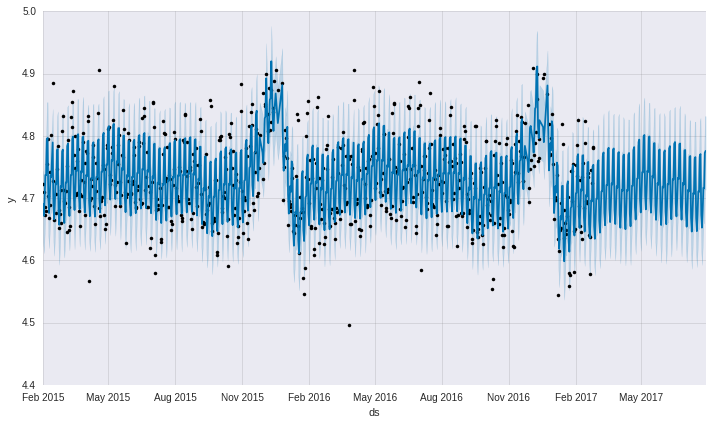

In [8]:
%matplotlib inline
m.plot(forecast);

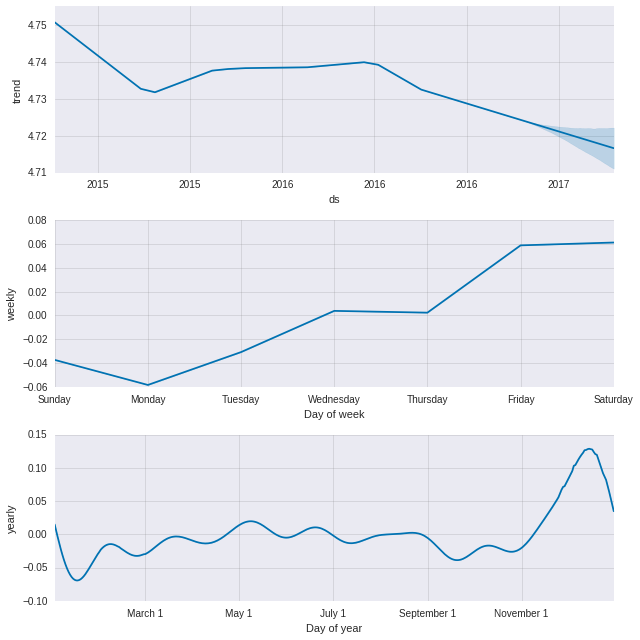

In [9]:
m.plot_components(forecast);

In [10]:
forecast

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2015-02-01,0.000000,4.750702,-0.060431,-0.060431,4.750702,4.750702,4.628946,4.744199,-0.037397,-0.037397,-0.037397,-0.023033,-0.023033,-0.023033,-0.060431,4.690271
1,2015-02-02,0.001325,4.750573,-0.079103,-0.079103,4.750573,4.750573,4.611556,4.727198,-0.058506,-0.058506,-0.058506,-0.020598,-0.020598,-0.020598,-0.079103,4.671470
2,2015-02-03,0.002649,4.750445,-0.049399,-0.049399,4.750445,4.750445,4.643235,4.759118,-0.030829,-0.030829,-0.030829,-0.018570,-0.018570,-0.018570,-0.049399,4.701046
3,2015-02-04,0.003974,4.750316,-0.013089,-0.013089,4.750316,4.750316,4.679439,4.796700,0.003878,0.003878,0.003878,-0.016966,-0.016966,-0.016966,-0.013089,4.737227
4,2015-02-05,0.005298,4.750187,-0.013413,-0.013413,4.750187,4.750187,4.678596,4.792774,0.002379,0.002379,0.002379,-0.015792,-0.015792,-0.015792,-0.013413,4.736774
5,2015-02-06,0.006623,4.750058,0.043990,0.043990,4.750058,4.750058,4.734421,4.853949,0.059035,0.059035,0.059035,-0.015045,-0.015045,-0.015045,0.043990,4.794048
6,2015-02-07,0.007947,4.749930,0.046731,0.046731,4.749930,4.749930,4.740312,4.854135,0.061440,0.061440,0.061440,-0.014709,-0.014709,-0.014709,0.046731,4.796661
7,2015-02-08,0.009272,4.749801,-0.052159,-0.052159,4.749801,4.749801,4.639650,4.753037,-0.037397,-0.037397,-0.037397,-0.014762,-0.014762,-0.014762,-0.052159,4.697642
8,2015-02-09,0.010596,4.749672,-0.073678,-0.073678,4.749672,4.749672,4.619527,4.738202,-0.058506,-0.058506,-0.058506,-0.015173,-0.015173,-0.015173,-0.073678,4.675994
9,2015-02-10,0.011921,4.749544,-0.046732,-0.046732,4.749544,4.749544,4.647478,4.761585,-0.030829,-0.030829,-0.030829,-0.015903,-0.015903,-0.015903,-0.046732,4.702812


## Additional information to Model
    Scratcher Event & Holidays to consider

In [11]:
#read in dates with Scratcher Event & Holidays listed
dates = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/work/master/changepoint_holiday.csv',parse_dates=['Scratcher Holiday','Ad Changepoint','Year Changepoint','Holidays'])
#set up different event/holiday dataframes, their 'impact' windows and combine sets
scratch_hol = pd.DataFrame({
    'holiday':'holiday',
    'ds': pd.to_datetime(dates['Scratcher Holiday'].dropna()),
    'lower_window':0,
    'upper_window':7,
})
reg_hol = pd.DataFrame({
    'holiday':'holiday',
    'ds': pd.to_datetime(dates['Holidays'].dropna()),
    'lower_window':-2,
    'upper_window':2,
})
holidays = scratch_hol.append(reg_hol)
holidays

,ds,holiday,lower_window,upper_window
0,2016-12-14,holiday,0,7
1,2016-12-02,holiday,0,7
2,2016-11-09,holiday,0,7
3,2016-10-14,holiday,0,7
4,2016-08-12,holiday,0,7
5,2016-07-15,holiday,0,7
6,2016-06-17,holiday,0,7
7,2016-04-01,holiday,0,7
8,2016-03-16,holiday,0,7
9,2015-12-16,holiday,0,7


## Forecast fitted with Events

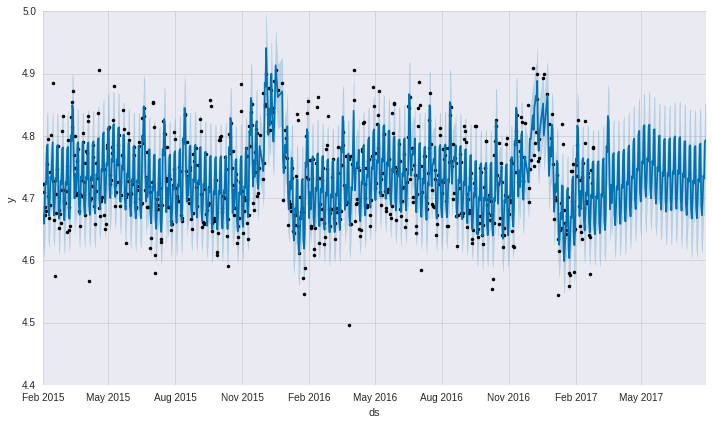

In [23]:
m1 = Prophet(changepoint_prior_scale=0.25, holidays=scratch_hol)
forecast1 = m1.fit(txns).predict(future)
m1.plot(forecast1);

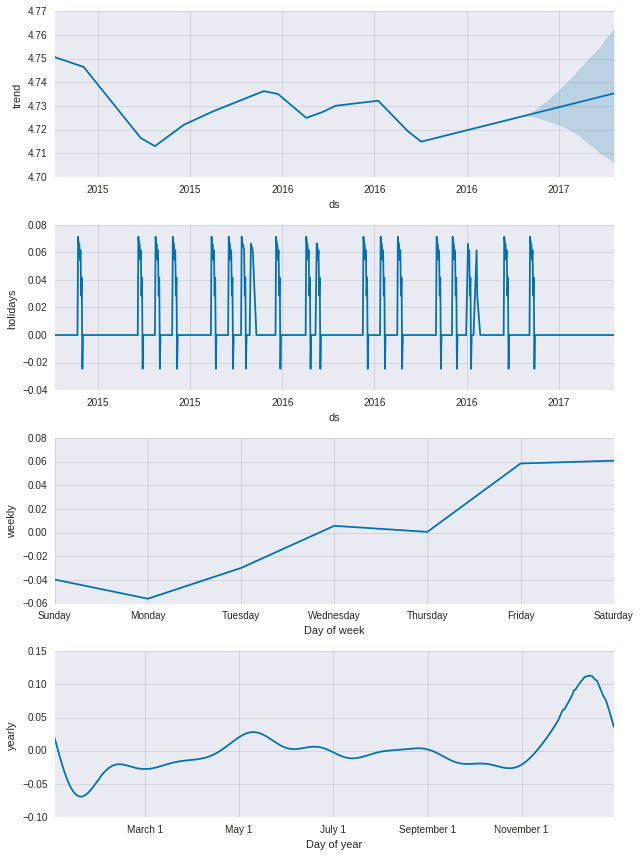

In [12]:
m1.plot_components(forecast1);

In [14]:
forecast1

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,holiday,holiday_lower,holiday_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2015-02-01,0.000000,4.750661,-0.078447,-0.078447,4.750661,4.750661,4.618842,4.723496,0.0,0.0,0.0,-0.039721,-0.039721,-0.039721,-0.038726,-0.038726,-0.038726,-0.078447,4.672214
1,2015-02-02,0.001325,4.750573,-0.091829,-0.091829,4.750573,4.750573,4.605631,4.711752,0.0,0.0,0.0,-0.055943,-0.055943,-0.055943,-0.035886,-0.035886,-0.035886,-0.091829,4.658744
2,2015-02-03,0.002649,4.750485,-0.063152,-0.063152,4.750485,4.750485,4.635375,4.738516,0.0,0.0,0.0,-0.029922,-0.029922,-0.029922,-0.033231,-0.033231,-0.033231,-0.063152,4.687333
3,2015-02-04,0.003974,4.750397,-0.025068,-0.025068,4.750397,4.750397,4.673139,4.777727,0.0,0.0,0.0,0.005725,0.005725,0.005725,-0.030793,-0.030793,-0.030793,-0.025068,4.725329
4,2015-02-05,0.005298,4.750309,-0.028001,-0.028001,4.750309,4.750309,4.670271,4.770939,0.0,0.0,0.0,0.000597,0.000597,0.000597,-0.028597,-0.028597,-0.028597,-0.028001,4.722308
5,2015-02-06,0.006623,4.750221,0.031792,0.031792,4.750221,4.750221,4.728729,4.832586,0.0,0.0,0.0,0.058454,0.058454,0.058454,-0.026662,-0.026662,-0.026662,0.031792,4.782013
6,2015-02-07,0.007947,4.750133,0.035813,0.035813,4.750133,4.750133,4.736387,4.836136,0.0,0.0,0.0,0.060811,0.060811,0.060811,-0.024998,-0.024998,-0.024998,0.035813,4.785946
7,2015-02-08,0.009272,4.750045,-0.063332,-0.063332,4.750045,4.750045,4.634493,4.738520,0.0,0.0,0.0,-0.039721,-0.039721,-0.039721,-0.023611,-0.023611,-0.023611,-0.063332,4.686713
8,2015-02-09,0.010596,4.749957,-0.078443,-0.078443,4.749957,4.749957,4.620390,4.725421,0.0,0.0,0.0,-0.055943,-0.055943,-0.055943,-0.022500,-0.022500,-0.022500,-0.078443,4.671514
9,2015-02-10,0.011921,4.749869,-0.051580,-0.051580,4.749869,4.749869,4.644898,4.750989,0.0,0.0,0.0,-0.029922,-0.029922,-0.029922,-0.021658,-0.021658,-0.021658,-0.051580,4.698290


In [15]:
forecast.to_csv('prophet_txns_fcst.csv')
forecast1.to_csv('prophet_txns_fcst1.csv')

In [16]:
m1.params

{'beta': array([[  0.00000000e+00,  -1.24741397e-03,   7.13510035e-04,
          -4.92695487e-03,   2.86644408e-03,  -4.41439584e-03,
           2.91931715e-03,  -4.10110204e-03,  -8.94468737e-04,
          -3.42196263e-03,  -5.13800172e-04,  -2.47283035e-03,
          -1.63205909e-04,  -1.31453252e-03,  -7.87340255e-04,
          -1.43760273e-03,   1.63921463e-04,  -4.30452511e-04,
           4.63163921e-04,  -5.55181323e-04,  -5.93774724e-05,
           7.95856261e-03,   6.98100173e-03,  -3.74473660e-05,
          -5.88852108e-03,  -1.87686589e-03,  -9.70943162e-04,
           1.45164395e-02,   1.35280304e-02,   1.34564234e-02,
           1.10928670e-02,   1.25162237e-02,   5.82511057e-03,
           8.46973203e-03,  -4.98073978e-03]]),
 'delta': array([[  7.02410346e-07,  -3.62500736e-02,   2.46831121e-07,
           6.70666345e-06,   7.23898860e-07,   2.68843049e-02,
           5.25042977e-02,  -8.67731918e-08,  -1.11224649e-02,
          -3.07147728e-06,  -2.55753202e-03,   5.7341

## Data by Week

In [17]:
week_data = pd.read_csv('https://raw.githubusercontent.com/zpencerguy/work/master/week_data.csv', parse_dates=['ds'])
week_data.describe()

,# Txns,Sales $
count,112.000000,1.120000e+02
mean,387623.285714,2.389304e+07
std,47703.433555,7.113570e+06
min,316991.000000,1.529568e+07
25%,363127.750000,2.034617e+07
50%,375542.500000,2.195671e+07
75%,398826.000000,2.475855e+07
max,596989.000000,5.983885e+07


In [18]:
week_txns = week_data[['ds','# Txns']]
week_txns['y'] = np.log10(week_txns['# Txns'])
del week_txns['# Txns']
week_txns

,ds,y
0,2015-02-07,5.564134
1,2015-02-14,5.638412
2,2015-02-21,5.546383
3,2015-02-28,5.567790
4,2015-03-07,5.562261
5,2015-03-14,5.620316
6,2015-03-21,5.599127
7,2015-03-28,5.572017
8,2015-04-04,5.613450
9,2015-04-11,5.558992


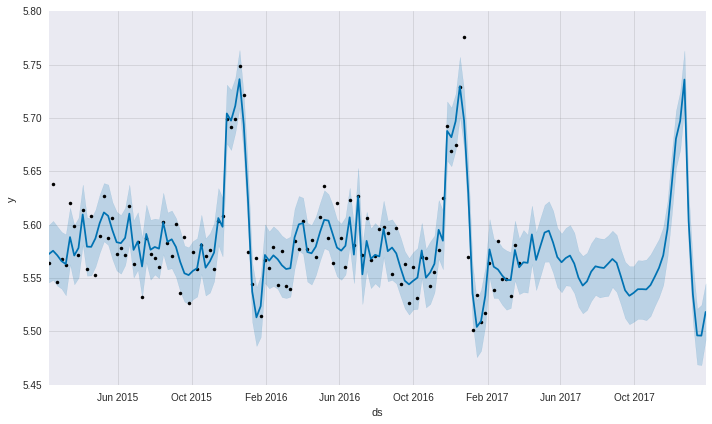

In [19]:
m_week = Prophet(holidays=holidays, changepoints=['2016-01-30','2017-02-04'],changepoint_prior_scale=.5)

m_week.fit(week_txns)

future_week = m_week.make_future_dataframe(periods=44, freq='W-SAT')

fcst_week = m_week.predict(future_week)
m_week.plot(fcst_week);
#m_week.plot_components(fcst_week);

In [20]:
fcst_week.to_csv('fcst_week.csv')

In [21]:
fcst_week

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,holiday,holiday_lower,holiday_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2015-02-07,0.000000,5.561025,0.011518,0.011518,5.561025,5.561025,5.545965,5.599770,0.000000,0.000000,0.000000,0.024136,0.024136,0.024136,-0.012618,-0.012618,-0.012618,0.011518,5.572544
1,2015-02-14,0.009009,5.560944,0.014708,0.014708,5.560944,5.560944,5.548372,5.603621,0.000000,0.000000,0.000000,0.024136,0.024136,0.024136,-0.009427,-0.009427,-0.009427,0.014708,5.575652
2,2015-02-21,0.018018,5.560862,0.010485,0.010485,5.560862,5.560862,5.542859,5.598424,0.000000,0.000000,0.000000,0.024136,0.024136,0.024136,-0.013651,-0.013651,-0.013651,0.010485,5.571347
3,2015-02-28,0.027027,5.560781,0.005169,0.005169,5.560781,5.560781,5.540138,5.593321,0.000000,0.000000,0.000000,0.024136,0.024136,0.024136,-0.018967,-0.018967,-0.018967,0.005169,5.565950
4,2015-03-07,0.036036,5.560699,0.002481,0.002481,5.560699,5.560699,5.533914,5.590979,0.000000,0.000000,0.000000,0.024136,0.024136,0.024136,-0.021655,-0.021655,-0.021655,0.002481,5.563180
5,2015-03-14,0.045045,5.560617,0.027829,0.027829,5.560617,5.560617,5.562951,5.615972,0.023477,0.023477,0.023477,0.024136,0.024136,0.024136,-0.019784,-0.019784,-0.019784,0.027829,5.588446
6,2015-03-21,0.054054,5.560536,0.010652,0.010652,5.560536,5.560536,5.544183,5.599580,0.000000,0.000000,0.000000,0.024136,0.024136,0.024136,-0.013484,-0.013484,-0.013484,0.010652,5.571188
7,2015-03-28,0.063063,5.560454,0.017796,0.017796,5.560454,5.560454,5.550312,5.606591,0.000000,0.000000,0.000000,0.024136,0.024136,0.024136,-0.006340,-0.006340,-0.006340,0.017796,5.578250
8,2015-04-04,0.072072,5.560372,0.049316,0.049316,5.560372,5.560372,5.581406,5.637678,0.028476,0.028476,0.028476,0.024136,0.024136,0.024136,-0.003296,-0.003296,-0.003296,0.049316,5.609689
9,2015-04-11,0.081081,5.560291,0.019230,0.019230,5.560291,5.560291,5.552330,5.606811,0.000000,0.000000,0.000000,0.024136,0.024136,0.024136,-0.004906,-0.004906,-0.004906,0.019230,5.579521
